In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
from torchvision.utils import make_grid
from torchvision.utils import save_image
from a3_gan_template import Generator


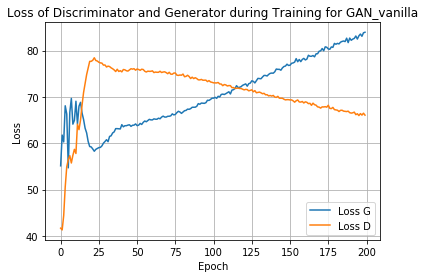

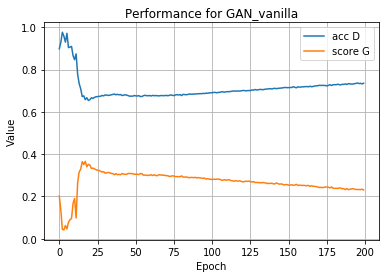

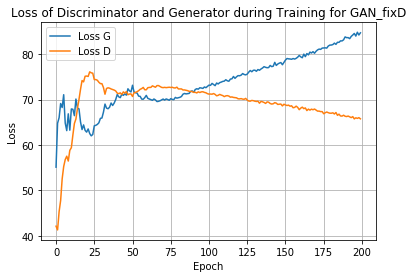

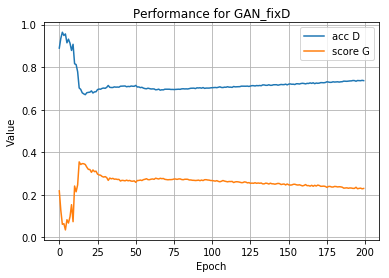

In [4]:
#initialise params
models = ["GAN_vanilla", "GAN_fixD"]
for model in models:
    path_model = (f"./{model}/models/generator.pt")
    path_plots = (f"./{model}/plots/")

    zdim=100
    
    #Load generator model
    generator = Generator(zdim=zdim)
    generator.load_state_dict(torch.load(path_model, map_location="cpu"))
    
    for idx in range(5):
        #sample random noise
        z = torch.randn(2, zdim)

        #interpolate
        interpolated = [torch.linspace(z[0][i], z[1][i], steps=9) 
                        for i in range(zdim)]
        interpolated = torch.stack(interpolated, dim=1)
        #print(interpolated.shape)

        #forward pass
        fake_imgs = generator(interpolated)

        save_image(fake_imgs.view(-1,1,28,28), 
                  path_plots + (f"interpolated_{idx}.png"),
                   nrow=9, normalize=True
                  )
        
    #load stats
    stats = np.load(path_plots + "results.npy").item()
    
    # plot loss curves
    x = range(len(stats['loss_G']))

    fig, ax = plt.subplots()
    ax.plot(x, stats['loss_G'], label="Loss G")
    ax.plot(x, stats['loss_D'], label="Loss D")

    ax.set_title(f'Loss of Discriminator and Generator during Training for {model}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.grid(True)
    ax.legend()
    plt.show()
    
    #plot score & acc
    fig, ax = plt.subplots()
    ax.plot(x, stats['acc'], label="acc D")
    ax.plot(x, stats['score'], label="score G")

    ax.set_title(f'Performance for {model}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()
    plt.show()